In [1]:
pip install torch torchvision pycocotools


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'DINO/train/_annotations.coco.json'

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from pycocotools.coco import COCO
from PIL import Image


annotation_file = r'C:\Users\kalas\OneDrive\Desktop\DINO\train\_annotations.coco.json'
img_dir = r'C:\Users\kalas\OneDrive\Desktop\DINO\train'
batch_size = 4
num_classes = 16  

class CustomCOCODataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None):
        self.coco = COCO(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.ids = list(self.coco.imgs.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, index):
        img_id = self.ids[index]
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = f"{self.img_dir}/{img_info['file_name']}"
        img = Image.open(img_path).convert('RGB')
        
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        anns = self.coco.loadAnns(ann_ids)
        
       
        label = anns[0]['category_id'] if len(anns) > 0 else 0

        if self.transform:
            img = self.transform(img)

        return img, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


dataset = CustomCOCODataset(annotation_file, img_dir, transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        
        optimizer.zero_grad()

        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.8f}')

print('Training finished.')


torch.save(model.state_dict(), 'model.pth')

print('Training finished and model saved.')



loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


c:\Users\kalas\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kalas\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25, Loss: 0.06542301
Epoch 2/25, Loss: 0.00000173
Epoch 3/25, Loss: 0.00000210
Epoch 4/25, Loss: 0.00000191
Epoch 5/25, Loss: 0.00000207
Epoch 6/25, Loss: 0.00000191
Epoch 7/25, Loss: 0.00000196
Epoch 8/25, Loss: 0.00000183
Epoch 9/25, Loss: 0.00000207
Epoch 10/25, Loss: 0.00000228
Epoch 11/25, Loss: 0.00000225
Epoch 12/25, Loss: 0.00000197
Epoch 13/25, Loss: 0.00000207
Epoch 14/25, Loss: 0.00000242
Epoch 15/25, Loss: 0.00000205
Epoch 16/25, Loss: 0.00000170
Epoch 17/25, Loss: 0.00000165


In [9]:
import torch
from torch.utils.data import DataLoader , Dataset
from torchvision import transforms
from pycocotools.coco import COCO
from PIL import Image
import os

annotation_file = r'C:\Users\kalas\OneDrive\Desktop\DINO\test\_annotations.coco.json'
img_dir = r'C:\Users\kalas\OneDrive\Desktop\DINO\test'
batch_size = 4
num_classes = 16  

class CustomCOCODataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None):
        self.coco = COCO(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.ids = list(self.coco.imgs.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, index):
        img_id = self.ids[index]
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = f"{self.img_dir}/{img_info['file_name']}"
        img = Image.open(img_path).convert('RGB')
        
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        anns = self.coco.loadAnns(ann_ids)
        
        label = anns[0]['category_id'] if len(anns) > 0 else 0

        if self.transform:
            img = self.transform(img)

        return img, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


test_dataset = CustomCOCODataset(annotation_file, img_dir, transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


model.load_state_dict(torch.load('model.pth')) 
model.eval()

def predict(model, dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
    return predictions


predictions = predict(model, test_dataloader)


for i, pred in enumerate(predictions):
    print(f"Image {i}: Predicted label: {pred}")


with open('predictions.txt', 'w') as f:
    for i, pred in enumerate(predictions):
        f.write(f"Image {i}: Predicted label: {pred}\n")

print("Testing finished.")


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Image 0: Predicted label: 1
Image 1: Predicted label: 1
Image 2: Predicted label: 1
Image 3: Predicted label: 1
Image 4: Predicted label: 1
Image 5: Predicted label: 1
Image 6: Predicted label: 1
Image 7: Predicted label: 1
Image 8: Predicted label: 1
Image 9: Predicted label: 1
Image 10: Predicted label: 1
Image 11: Predicted label: 1
Image 12: Predicted label: 1
Image 13: Predicted label: 1
Image 14: Predicted label: 1
Image 15: Predicted label: 1
Image 16: Predicted label: 1
Image 17: Predicted label: 1
Image 18: Predicted label: 1
Image 19: Predicted label: 1
Image 20: Predicted label: 1
Image 21: Predicted label: 1
Image 22: Predicted label: 1
Image 23: Predicted label: 1
Image 24: Predicted label: 1
Image 25: Predicted label: 1
Image 26: Predicted label: 1
Image 27: Predicted label: 1
Image 28: Predicted label: 1
Image 29: Predicted label: 1
Image 30: Predicted label: 1
Image 31: Predicted label: 1

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, dataloader):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return np.array(predictions), np.array(true_labels)


predictions, true_labels = evaluate_model(model, test_dataloader)


accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2184873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8033988].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..1.7859696].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.5528543].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.535425].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..

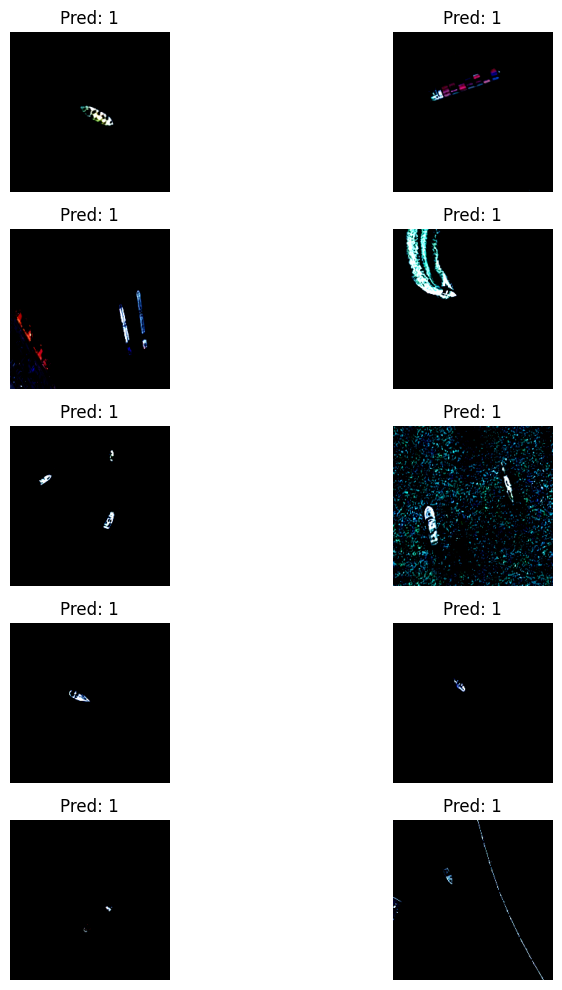

In [12]:
import matplotlib.pyplot as plt

def show_predictions(model, dataloader, num_images=5):
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(10, 10))  
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            for j in range(inputs.size()[0]):
                images_so_far += 1
                if images_so_far > num_images:
                    break
                
                ax = fig.add_subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Pred: {preds[j]}')
                ax.imshow(inputs.cpu().data[j].permute(1, 2, 0))
                
            if images_so_far >= num_images:
                break

    plt.tight_layout()
    plt.show()


show_predictions(model, test_dataloader, num_images=10)  # Adjust num_images as needed
